# "Learning" XOR Gate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Input-output for an XOR gate:

In [3]:
input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output = np.array([[0], [1], [1], [0]])  

### Visualize the gate:

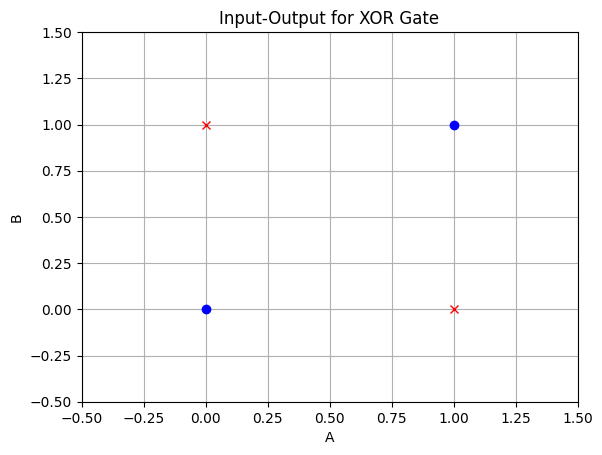

In [4]:
for i in range(len(input)):
    if output[i][0] == 1:
        plt.plot(input[i][0], input[i][1], 'rx')
    else:
        plt.plot(input[i][0], input[i][1], 'bo')

plt.title('Input-Output for XOR Gate')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

### Add noise to data:

In [5]:
Np = 100
x = []
y = []
z = []

for i in range(4):
    if output[i][0] == 1:
        x.append(np.random.normal(loc=input[i][0], scale=0.1, size=Np))
        y.append(np.random.normal(loc=input[i][1], scale=0.1, size=Np))
        z.append(np.ones(Np))
    else:
        x.append(np.random.normal(loc=input[i][0], scale=0.1, size=Np))
        y.append(np.random.normal(loc=input[i][1], scale=0.1, size=Np))
        z.append(-np.ones(Np))

x = np.concatenate(x)
y = np.concatenate(y)
z = np.concatenate(z)

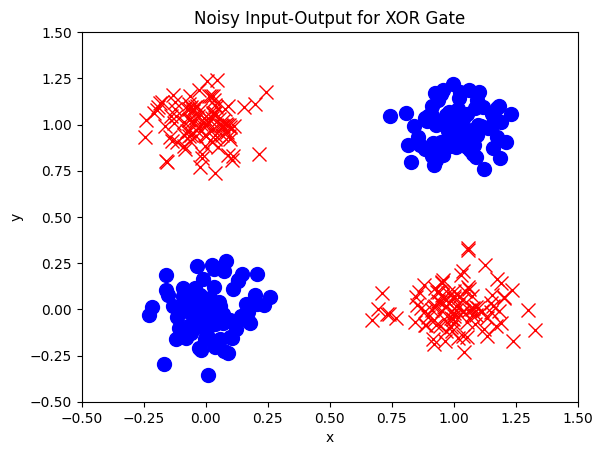

In [6]:
for i in range(len(y)):
    if z[i] == 1:
        plt.plot(x[i], y[i], 'rx', markersize=10)
    else:
        plt.plot(x[i], y[i], 'bo', markersize=10)

plt.title('Noisy Input-Output for XOR Gate')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

### Random initialization of weights:

In [7]:
w1 = 0
w2 = 1
b = 1

### Initial prediction:

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$$
z = \tanh(w_1 \; x + w_2 \; y + b)
$$

![Single_Neuron](Fig/Single_Neuron.png)

</div>
</div>

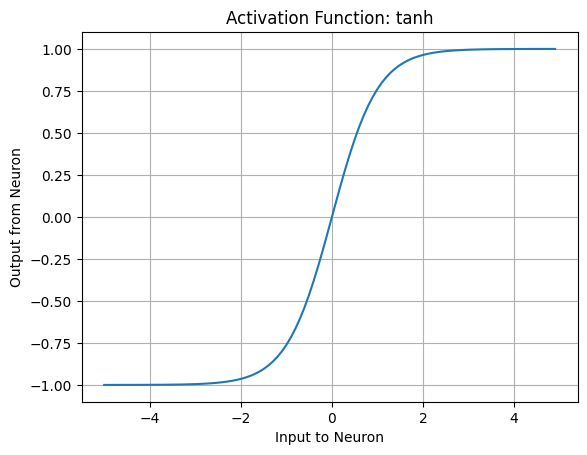

In [8]:
xx = np.arange(-5, 5, 0.1)
yy = np.tanh(xx)
plt.plot(xx, yy)
plt.title('Activation Function: tanh')
plt.xlabel('Input to Neuron')
plt.ylabel('Output from Neuron')
plt.grid()
plt.show()

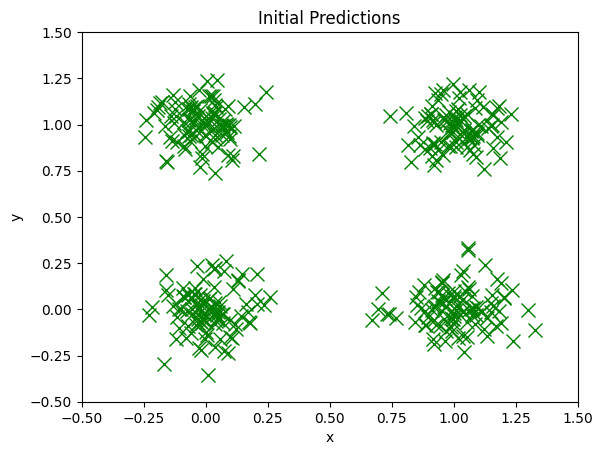

In [9]:
yy = np.tanh((w1 * x) + (w2 * y) + b)

for i in range(len(yy)):
    if yy[i] >= 0:
        plt.plot(x[i], y[i], 'gx', markersize=10)
    else:
        plt.plot(x[i], y[i], 'ko', markersize=10)

plt.title('Initial Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

### Loss function:

<div style="border: 2px solid #535353; width: 820px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 800px; overflow: auto;">

$$ 
E(w_1,w_2,b) = \frac{1}{N_p} \sum_{i=1}^{N_p} \; [z_i - \tanh( w_1 \: x_i + w_2 \: y_i + b)]^2 
$$

</div>
</div>

### Gradients:

<div style="border: 2px solid #535353; width: 820px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 800px; overflow: auto;">

$$
\frac{\partial E}{\partial w_1} = -\frac{2}{N_p} \sum_{i=1}^{N_p} \; [z_i-\tanh(w_1 \: x_i +  w_2 \: y_i + b)] \; \text{sech}^2(w_1 \: x_i + w_2 \: y_i + b) \; x_i
$$
$$
\frac{\partial E}{\partial w_2} = -\frac{2}{N_p} \sum_{i=1}^{N_p} \; [z_i-\tanh(w_1 \: x_i +  w_2 \: y_i + b)] \; \text{sech}^2(w_1 \: x_i + w_2 \: y_i + b) \; y_i
$$
$$
\frac{\partial E}{\partial b} = -\frac{2}{N_p} \sum_{i=1}^{N_p} \; [z_i-\tanh(w_1 \: x_i +  w_2 \: y_i + b)] \; \text{sech}^2(w_1 \: x_i + w_2 \: y_i + b)
$$

</div>
</div>

### Gradient descent:

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$$
w1 \; \rightarrow \; w1 - \eta \; \frac{\partial E}{\partial w1}
$$
$$
w2 \; \rightarrow \; w2 - \eta \; \frac{\partial E}{\partial w2}
$$
$$
b \; \rightarrow \; b - \eta \; \frac{\partial E}{\partial b}
$$

</div>
</div>

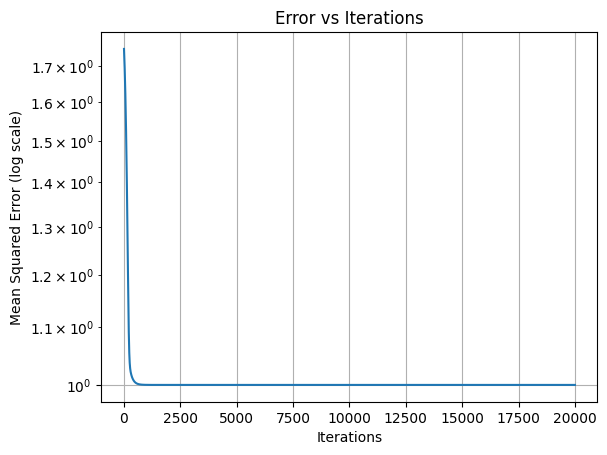

In [10]:
eta = 0.01  # Learning rate
n_iter = 20000

EE = np.zeros(n_iter)

for it in range(n_iter):
    zz = np.tanh((x * w1) + (y * w2) + b)
    error = z - zz

    sech2 = 1/np.cosh((x * w1) + (y * w2) + b)**2

    dE_dw1 = (-2 / (Np * 4)) * np.sum(error * sech2 * x)
    dE_dw2 = (-2 / (Np * 4)) * np.sum(error * sech2 * y)
    dE_db = (-2 / (Np * 4)) * np.sum(error * sech2)

    w1 -= eta * dE_dw1
    w2 -= eta * dE_dw2
    b -= eta * dE_db

    EE[it] = np.mean(error**2)

plt.plot(range(n_iter), EE)
plt.yscale('log')
plt.title('Error vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (log scale)')
plt.grid()
plt.show()

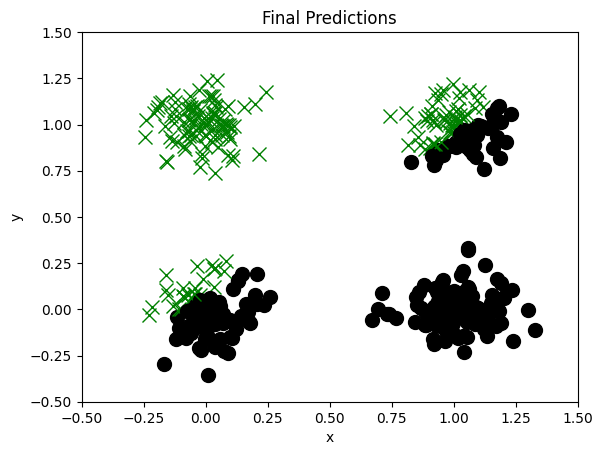

In [11]:
zz = np.tanh((x * w1) + (y * w2) + b)

for i in range(len(zz)):
    if zz[i] >= 0:
        plt.plot(x[i], y[i], 'gx', markersize=10)
    else:
        plt.plot(x[i], y[i], 'ko', markersize=10)

plt.title('Final Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

### The classifying "Line": 

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$$
y = -\left(\frac{w1}{w2}\right) x - \left( \frac{b}{w2} \right)
$$

</div>
</div>

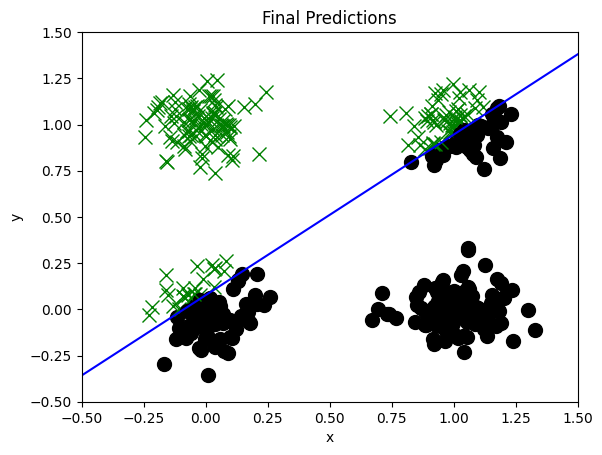

In [12]:
zz = np.tanh((x * w1) + (y * w2) + b)

for i in range(len(zz)):
    if zz[i] >= 0:
        plt.plot(x[i], y[i], 'gx', markersize=10)
    else:
        plt.plot(x[i], y[i], 'ko', markersize=10)

xx1 = np.linspace(-0.5, 1.5, 100)
xx2 = - (w1/w2) * xx1 - (b/w2)

plt.plot(xx1, xx2, 'b-')
plt.title('Final Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()